# Implement the Q-Learning algorithm on the Taxi environment 

## Set Up Environment

In [29]:
# Install necessary packages
!pip install gymnasium gym numpy matplotlib pandas pygame

  Using cached pygame-2.6.1-cp310-cp310-macosx_11_0_arm64.whl (12.4 MB)
You should consider upgrading via the '/Users/hsi/1557code/RLP/CSCN8020_Assignment2-Q_Learning/.venv/bin/python3.10 -m pip install --upgrade pip' command.


## Initialize the Taxi Environment
Use the Taxi environment from Gymnasium Documentation:
 
https://gymnasium.farama.org/environments/toy_text/taxi/

In [3]:
# Import library
import os

# Check if 'assignment2_utils.py' exists in the current directory
print('assignment2_utils.py' in os.listdir())
print(os.listdir())

True
['requirements.txt', 'assignment2_utils.py', '__pycache__', 'README.md', '.gitignore', '.venv', 'Taxi_Q-Learning.ipynb', '.git']


In [4]:
# Initialize the Taxi environment
import gymnasium as gym
from assignment2_utils import describe_env

# Define the Taxi describe environment
def describe_env(env):
    obs = env.observation_space
    num_obs = env.observation_space.n
    # Try grabbing reward_range, otherwise default to Taxi-v3 definition
    try:
        reward_range = env.reward_range
    except AttributeError:
        reward_range = (-10, 20)
    action_desc = {
        0: "Move south (down)",
        1: "Move north (up)",
        2: "Move east (right)",
        3: "Move west (left)",
        4: "Pick up passenger",
        5: "Drop off passenger"
    }
    print("Observation space: ", obs)
    print("Number of states: ", num_obs)
    print("Reward range: ", reward_range)
    print("Action mapping:")
    for k, v in action_desc.items():
        print(f"  {k}: {v}")

# Create the Taxi environment
env = gym.make('Taxi-v3')
describe_env(env) # Prints details: action space, observation space, etc.

Observation space:  Discrete(500)
Number of states:  500
Reward range:  (-10, 20)
Action mapping:
  0: Move south (down)
  1: Move north (up)
  2: Move east (right)
  3: Move west (left)
  4: Pick up passenger
  5: Drop off passenger


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


## Q-Learning Implementation Template
- Initialize a Q-table for 500 states × 6 actions
- Implement the core learning loop with required hyperparameters
- Parameter experiments
    - Test learning rates: [0.1, 0.01, 0.001] (keep epsilon at 0.1)
    - Test exploration factors: [0.1, 0.2, 0.3] (keep alpha at 0.1)

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a function Q-learning
# Default hyperparameters: alpha = Learning rate, epsilon = Exploration factor, gamma = Discount factor
def run_q_learning(alpha=0.1, epsilon=0.1, gamma=0.9, num_episodes=1000):
    # Setting environment and Q-table
    env = gym.make('Taxi-v3')
    num_states = env.observation_space.n # 500
    num_actions = env.action_space.n     # 6
    q_table = np.zeros((num_states, num_actions))
    steps_per_episode = []
    avg_return_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_return = 0
        steps = 0
        while not done:
            # Epsilon-greedy policy: random action or best known
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            next_state, reward, done, truncated, _ = env.step(action)
            
            # Q-value update
            q_old = q_table[state, action]
            q_table[state, action] = q_old + alpha * (reward + gamma * np.max(q_table[next_state]) - q_old)
            state = next_state
            total_return += reward
            steps += 1
        steps_per_episode.append(steps)
        avg_return_per_episode.append(total_return)

    return steps_per_episode, avg_return_per_episode

## Plots Learning Rate Test and Exploration Test

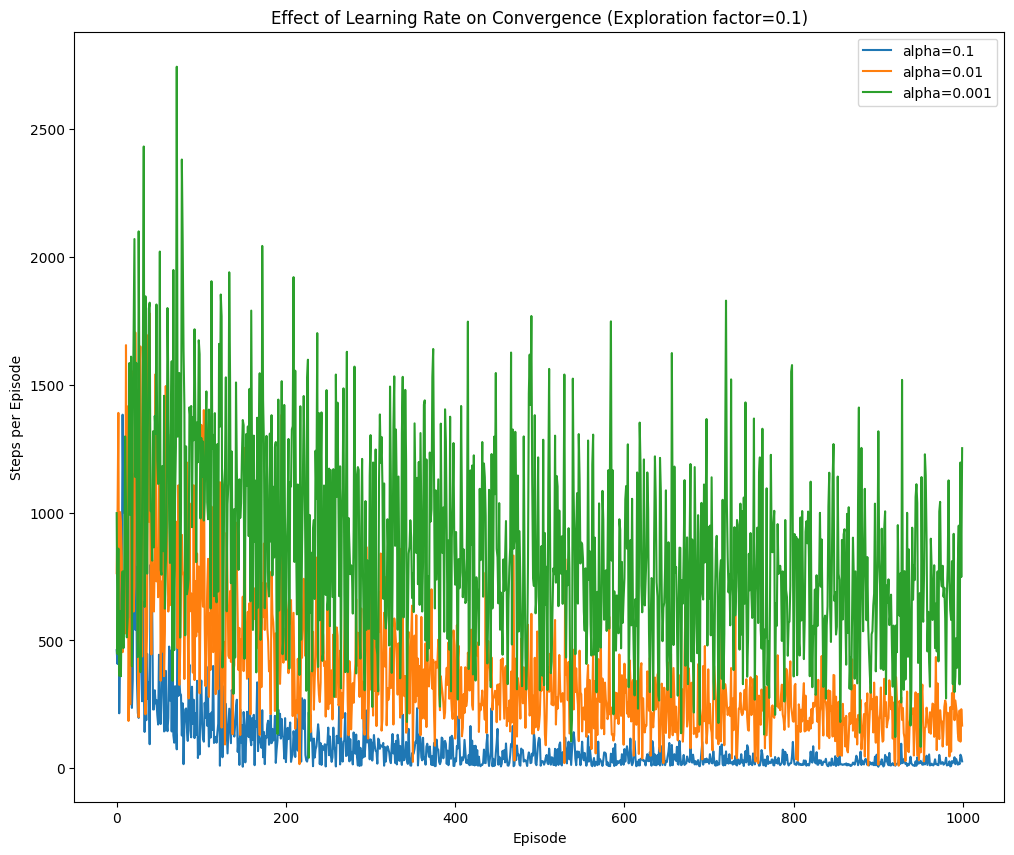

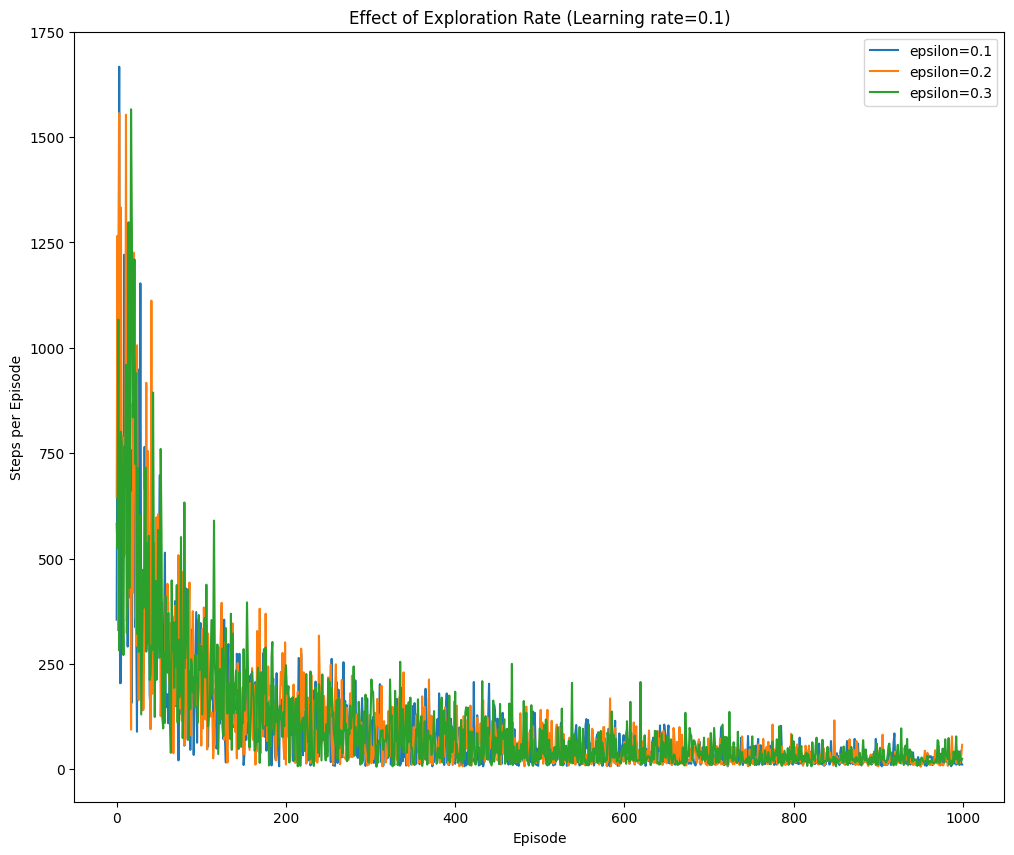

In [6]:
# Learning rate test (fixed epsilon=0.1)
plt.figure(figsize=(12, 10))
for alpha in [0.1, 0.01, 0.001]:
    steps, returns = run_q_learning(alpha=alpha, epsilon=0.1)
    plt.plot(steps, label=f'alpha={alpha}')
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.title('Effect of Learning Rate on Convergence (Exploration factor=0.1)')
plt.legend()
plt.show()

# Exploration test (fixed alpha=0.1)
plt.figure(figsize=(12, 10))
for epsilon in [0.1, 0.2, 0.3]:
    steps, returns = run_q_learning(alpha=0.1, epsilon=epsilon)
    plt.plot(steps, label=f'epsilon={epsilon}')
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.title('Effect of Exploration Rate (Learning rate=0.1)')
plt.legend()
plt.show()

## Results Analysis
### Parameter Comparison and Observations

#### Learning Rate Experiments (alpha)
- **Tested values:** $0.1$, $0.01$, $0.001$ (with $\epsilon = 0.1$)
- **Observation of Effect of Learning Rate on Convergence (Exploration factor=0.1):**
  - **High learning rate ($0.1$)** converged **fastest**. The number of steps per episode dropped sharply and stabilized earlier compared to lower rates.
  - **Lower learning rates ($0.01, 0.001$)** led to much slower convergence. The agent required more episodes to learn, and in the lowest setting, learning was sluggish with more fluctuation in steps per episode.
  - **Returns per episode** followed a similar trend: a higher learning rate gave faster improvement in average return.

#### Exploration Factor Experiments (epsilon)
- **Tested values:** $0.1$, $0.2$, $0.3$ (with $\alpha = 0.1$)
- **Observation of Effect of Exploration Rate (Learning rate=0.1):**
  - **Lowest exploration ($\epsilon = 0.1$)** led to the fastest reduction in steps per episode, that meaning the agent quickly exploited what it had learned.
  - **Higher $\epsilon$ values (0.2, 0.3)** caused the agent to take more steps for each episode (more exploration, less exploitation), resulting in slower convergence.
  - However, too little exploration can sometimes make the agent stuck in suboptimal paths early; in practice for Taxi, $\epsilon = 0.1$ balanced initial exploration and eventual exploitation well.

### **Best Combination and Performance**

- **Best-performing setting:**
  - **Learning rate:** $\alpha = 0.1$
  - **Exploration factor:** $\epsilon = 0.1$

- **Re-run results with best settings:**

Final average steps per episode (last 100): 22.30
Final average return per episode (last 100): -7.42


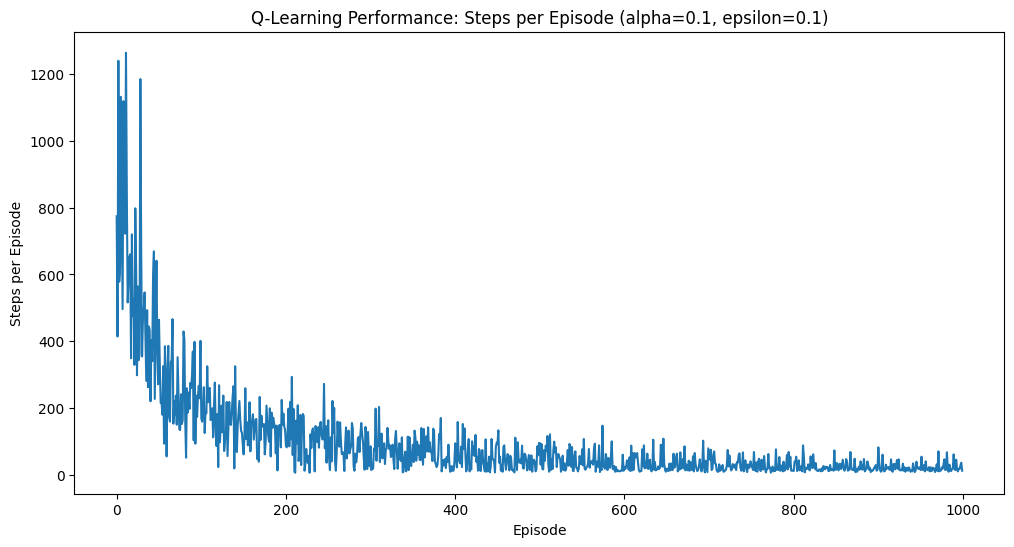

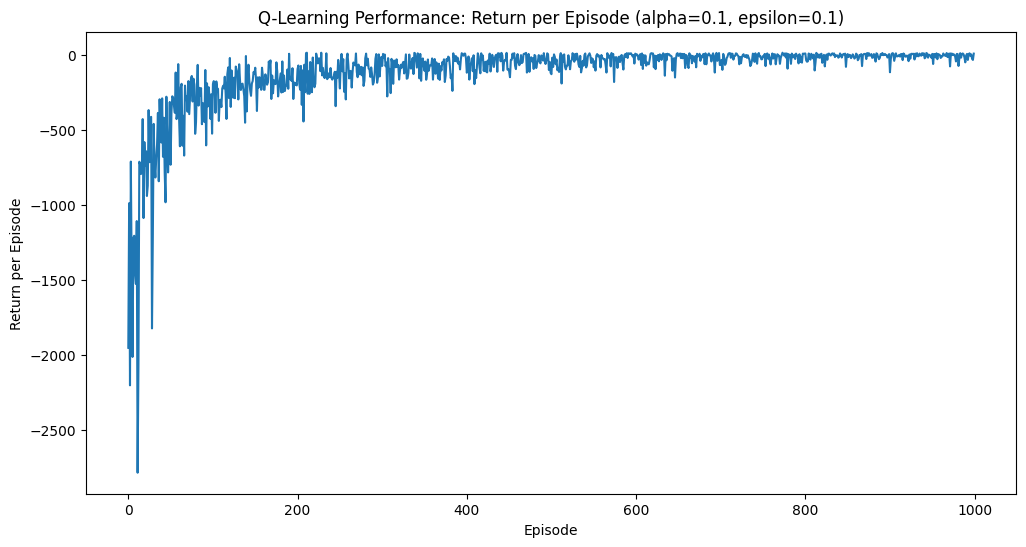

In [7]:
# Best settings
steps, returns = run_q_learning(alpha=0.1, epsilon=0.1, gamma=0.9, num_episodes=1000)

# Compute final 100-episode averages
final_avg_steps = np.mean(steps[-100:])
final_avg_returns = np.mean(returns[-100:])

print(f'Final average steps per episode (last 100): {final_avg_steps:.2f}')
print(f'Final average return per episode (last 100): {final_avg_returns:.2f}')

# Optional: Plot results
plt.figure(figsize=(12, 6))
plt.plot(steps)
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.title('Q-Learning Performance: Steps per Episode (alpha=0.1, epsilon=0.1)')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(returns)
plt.xlabel('Episode')
plt.ylabel('Return per Episode')
plt.title('Q-Learning Performance: Return per Episode (alpha=0.1, epsilon=0.1)')
plt.show()

## Results Analysis
**Convergence Speed:**  
With the best hyperparameter settings ($α=0.1, ε=0.1, γ=0.9$), the agent showed rapid convergence. The plot for steps per episode demonstrates that the number of steps required to complete each episode decreased sharply during the initial training period and stabilized at a lower value, indicating efficient learning of the optimal policy. Over the final 100 episodes, the agent maintained an average of **22.30 steps per episode**, which suggests it consistently completed its task effectively.

**Average Return:**  
The average return per episode over the final 100 episodes reached **-7.42**. In the Taxi-v3 environment, rewards are negative for most steps except successful passenger drop-off. A less negative (closer to zero) average means the agent has learned to minimize unnecessary moves and achieve the goal with higher efficiency. This improvement in the average return reflects successful policy learning and convergence toward optimal actions.

**Summary of Metrics:**  
- **Final average steps per episode (last 100):** **22.30**  
- **Final average return per episode (last 100):** **-7.42**

These results demonstrate that, with $α = 0.1$ and $ε=0.1$, the Q-learning agent developed a robust and efficient strategy, reliably minimizing both the number of steps and the penalty while maximizing task success. The policy’s stability in the last 100 episodes confirms robust convergence. Provide objective evidence that these parameter choices lead to the most successful Q-learning implementation for Taxi-v3.

## Summary

- Increasing the learning rate accelerates convergence, but too high a rate could destabilize learning. In Taxi-v3, $\alpha = 0.1$ worked best for both learning speed and stability.
- Lowering the exploration factor too much may cause premature exploitation, but in this simple problem, $\epsilon = 0.1$ produced the fastest convergence without getting stuck.
- For similar environments recommendation, start with $\alpha = 0.1$ and $\epsilon = 0.1$, then fine-tune as needed for stability and consistent policy performance.

## Render/Evaluate Policy
Here use simulate_episodes() from assignment2_utils.py with final Q-table for demo:

In [16]:
# Import libraries
import numpy as np
import gymnasium as gym

# Train and Get Q-table
def run_q_learning(alpha=0.1, epsilon=0.1, gamma=0.9, num_episodes=1000):
    env = gym.make('Taxi-v3')
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    q_table = np.zeros((num_states, num_actions))
    steps_per_episode = []
    avg_return_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_return = 0
        steps = 0
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            next_state, reward, done, truncated, _ = env.step(action)
            q_old = q_table[state, action]
            q_table[state, action] = q_old + alpha * (reward + gamma * np.max(q_table[next_state]) - q_old)
            state = next_state
            total_return += reward
            steps += 1
        steps_per_episode.append(steps)
        avg_return_per_episode.append(total_return)
    return q_table, steps_per_episode, avg_return_per_episode

# Train Q-table with best settings (run this only once)
q_table, steps, returns = run_q_learning(alpha=0.1, epsilon=0.1, gamma=0.9, num_episodes=1000)

# Use trained Q-table in Agent
class Agent:
    def __init__(self, q_table):
        self.q_table = q_table
    def select_action(self, state):
        return np.argmax(self.q_table[state])

# Confirm Q-table was trained
if np.all(q_table == 0):
    print("[WARNING] Q-table has not been trained! Agent will likely get stuck and not complete episodes.")
else:
    print("[INFO] Q-table loaded and ready for simulation.")

# Default simulate episodes with cap
def simulate_episodes_with_cap(env, agent, num_episodes=3, max_steps=100):
    color_names = ['Red', 'Green', 'Yellow', 'Blue']
    for ep in range(num_episodes):
        obs, info = env.reset()
        # Decode state information for the episode summary
        taxi_row, taxi_col, pass_loc, dest_idx = env.unwrapped.decode(obs)
        taxi_pos_str = f"({taxi_row}, {taxi_col})"
        passenger_str = color_names[pass_loc] if pass_loc < 4 else "in taxi"
        dest_str = color_names[dest_idx]
        print(f"\n--- Episode {ep+1} ---")
        print(f"Passenger is at: {passenger_str}, wants to go to {dest_str}. Taxi currently at {taxi_pos_str}")
        
        done = False
        steps = 0
        while not done and steps < max_steps:
            action = agent.select_action(obs)
            obs, reward, done, truncated, _ = env.step(action)

            # Show Taxi position
            taxi_row, taxi_col, _, _ = env.unwrapped.decode(obs)
            taxi_pos_str = f"({taxi_row}, {taxi_col})"
            print(f"Taxi currently at {taxi_pos_str}")

            # GUI or text rendering
            print(env.render())  
            steps += 1
        
        if done:
            print(f"Episode finished after {steps} steps.\n")
        else:
            print(f"[WARNING] Episode hit maximum steps cap ({max_steps}).\n")

# Usage example (choose render_mode as needed)
# To use GUI output
# env_display = gym.make('Taxi-v3', render_mode='human')
# final_agent = Agent(q_table)
# simulate_episodes_with_cap(env_display, final_agent, num_episodes=3, max_steps=100)

# To use text output
env_display = gym.make('Taxi-v3', render_mode='ansi')
simulate_episodes_with_cap(env_display, final_agent, num_episodes=3, max_steps=100)

[INFO] Q-table loaded and ready for simulation.

--- Episode 1 ---
Passenger is at: Red, wants to go to Green. Taxi currently at (0, 3)
Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Taxi currently at (0, 2)
+-----

## Analyze Results
The simulation demonstrates that a Q-learning agent, trained with optimal settings ($α=0.1, ε=0.1$), can efficiently complete the Taxi-v3 tasks. In the second and third episodes, the agent successfully picked up and dropped off passengers in only 13 and 12 steps, respectively, showing fast convergence and effective path planning. The logs also confirm that the agent correctly tracks the taxi's position throughout each episode, reflecting robust policy learning and execution.